# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [3]:
data = pd.read_csv('Datasets\\advanced-dls-spring-2021\\train.csv').copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [4]:
# TotalSpent содержит не численные значения, как должно быть
# Заменяем с заменой на NA, если значение не может быть конвертировано
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# Случайные 10  строк
data.loc[np.random.choice(data.index, 10)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1445,27,104.65,2964.00,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
4909,6,74.10,450.90,Female,1,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
1625,22,96.70,2082.95,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3639,60,19.95,1189.90,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1591,16,112.95,1882.55,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
1864,72,112.10,7965.95,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
2287,72,85.15,6316.20,Male,0,Yes,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
3048,71,98.65,6962.85,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
748,1,77.15,77.15,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
3434,34,79.60,2718.30,Female,1,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [50]:
# DataFrame с количеством NA значений
(data.isna()==True).sum(axis=0).to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# После очистки
data = data.dropna()
(data.isna()==True).sum(axis=0).to_frame().T

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

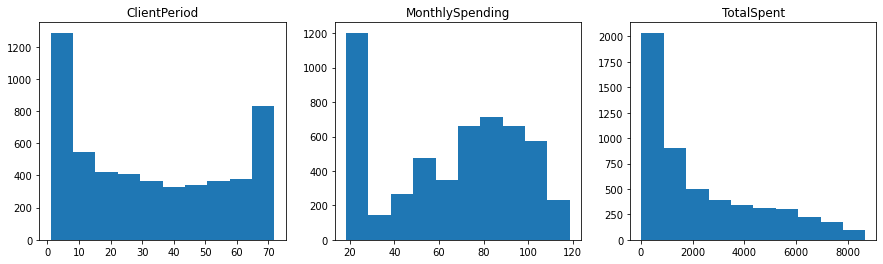

In [119]:
# YOUR CODE
fig, ax = plt.subplots(ncols=3, figsize=(15,4))
for i, feature in enumerate(num_cols):
    ax[i].hist(data[feature])
    ax[i].set_title(f'{feature}')
plt.show()

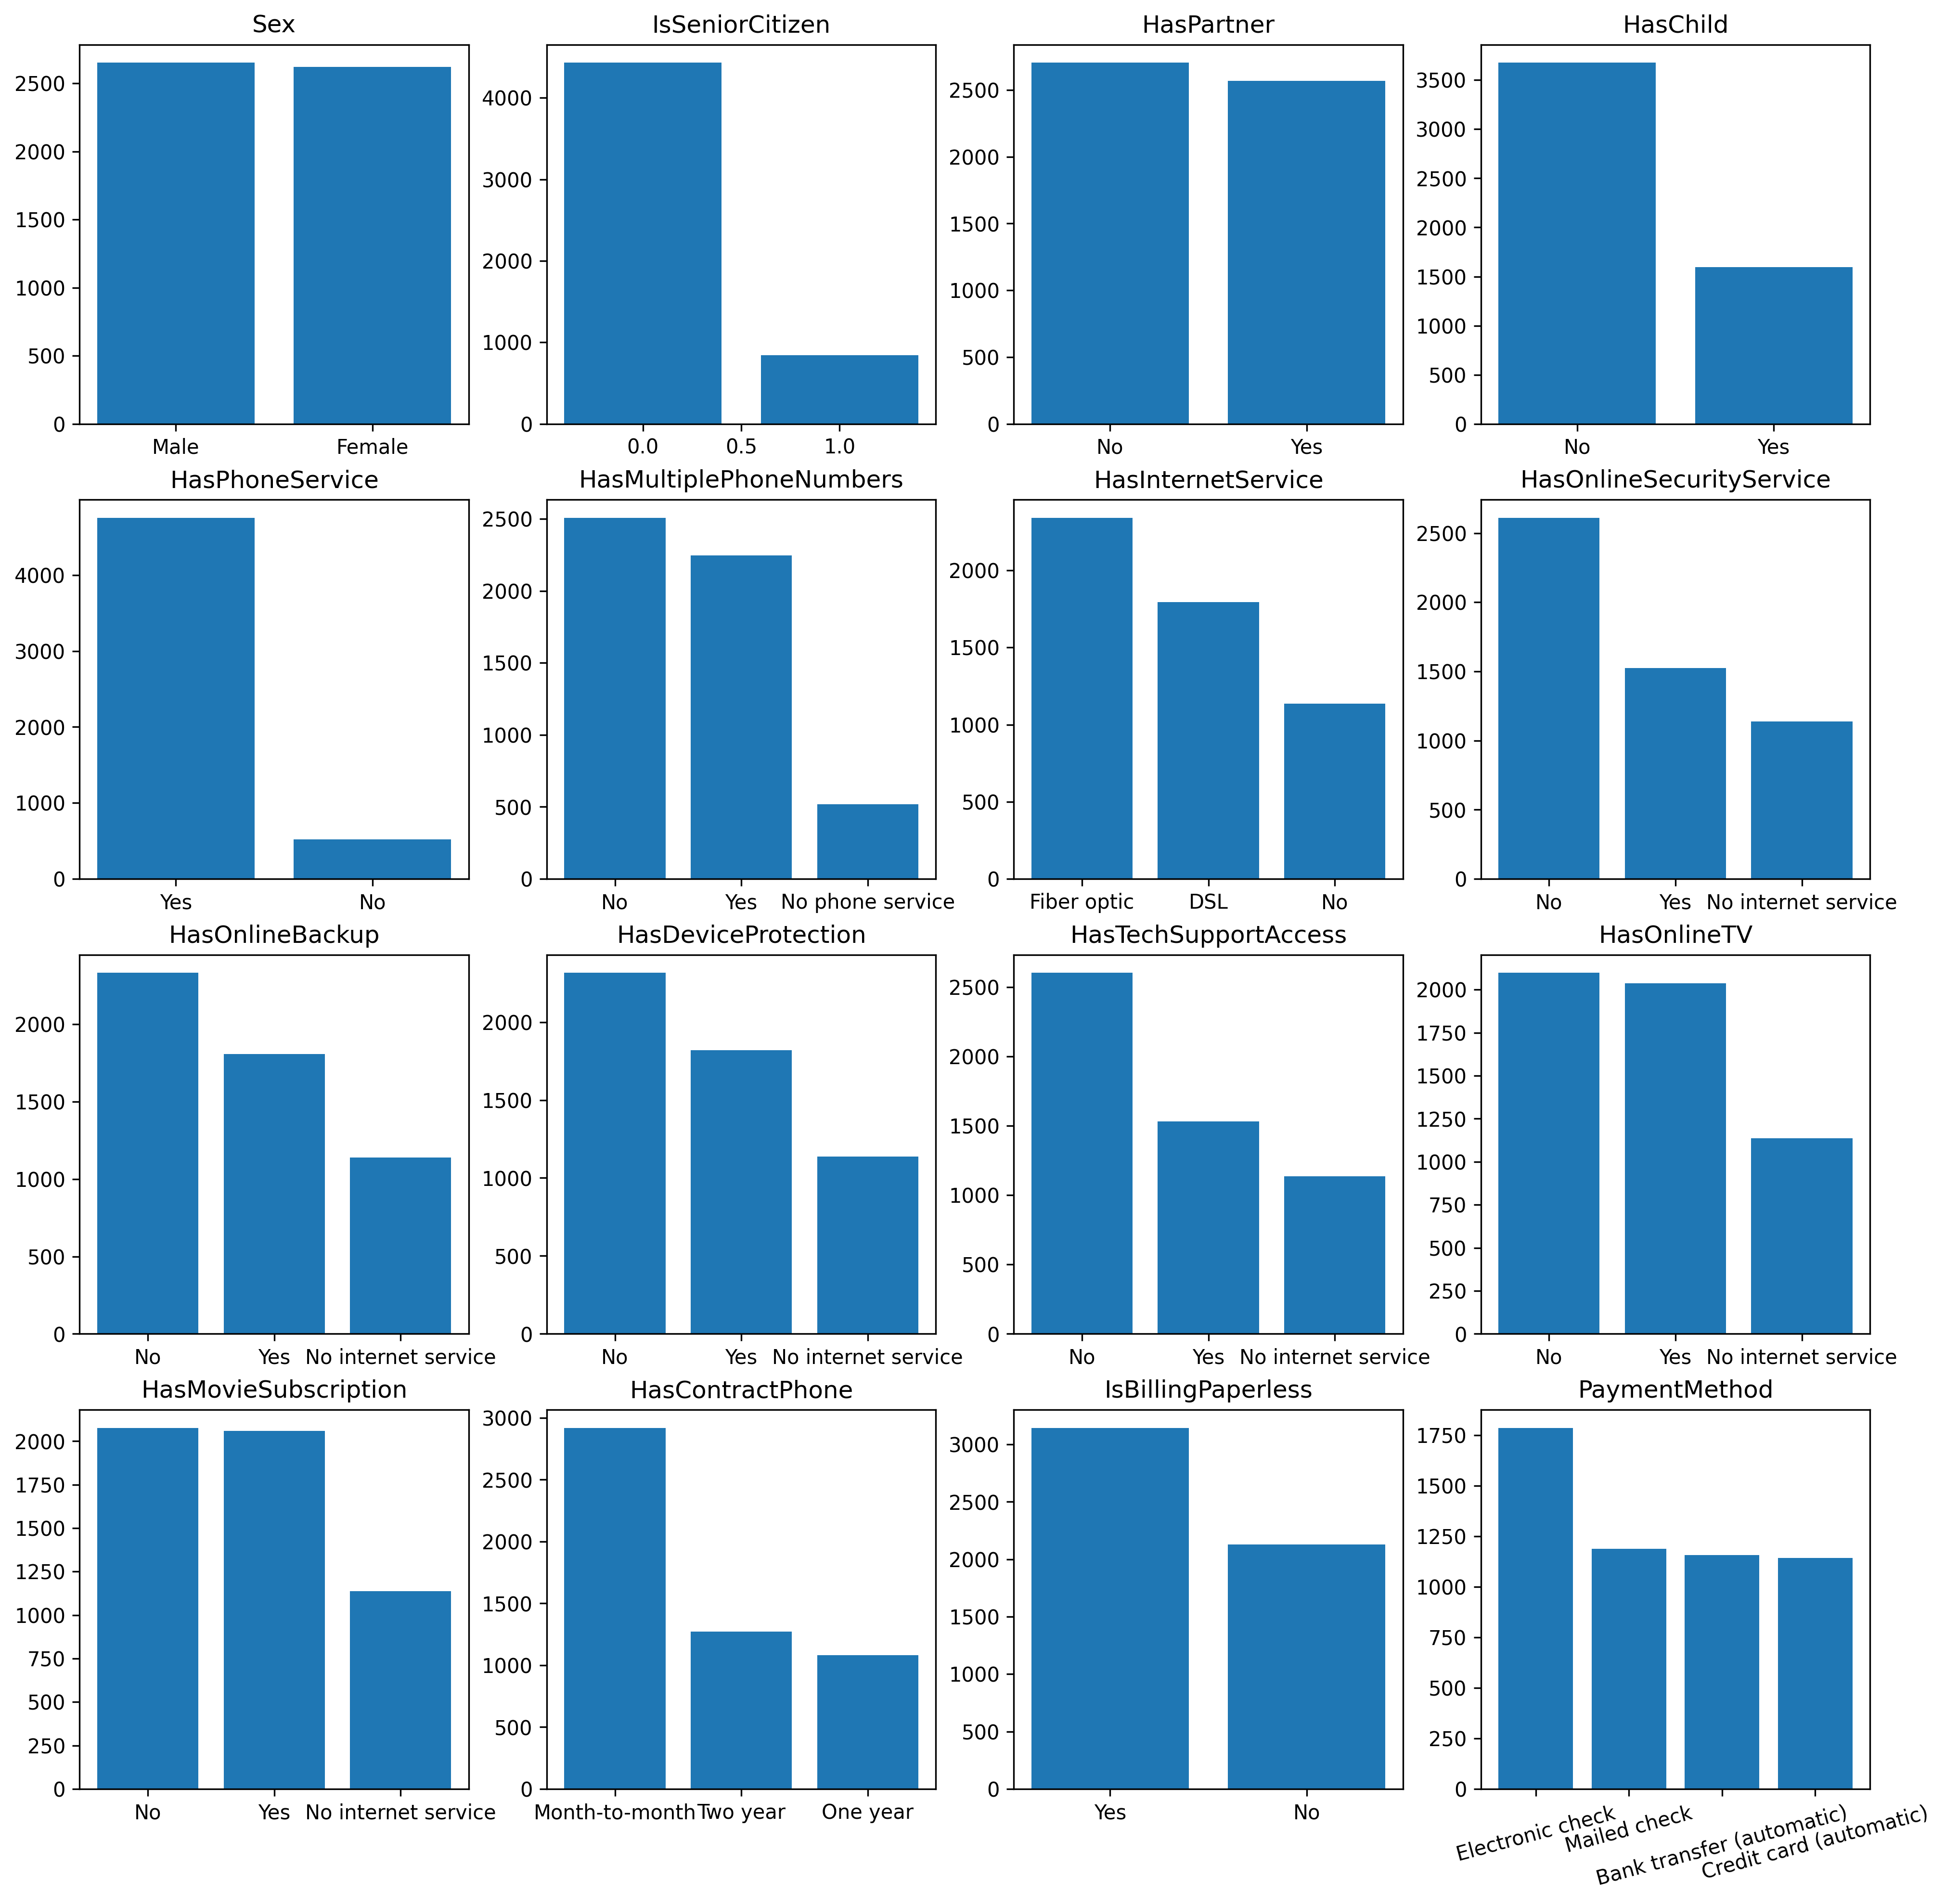

In [111]:
fig, ax = plt.subplots(4, 4, figsize=(16,16), dpi=300)
ax = ax.ravel()
for i, feature in enumerate(cat_cols):
    x = data.value_counts(feature)
    ax[i].bar(x.index, x)
    ax[i].set_title(f'{feature}')
plt.xticks(rotation=15)
# plt.suptitle('Categorial data')
plt.show()

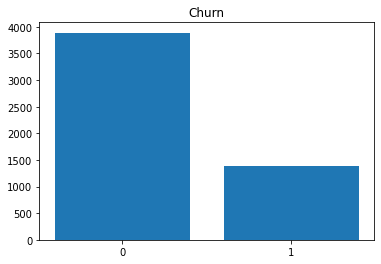

In [128]:
# barplot целевой переменной
target_x = data.value_counts(target_col)
plt.bar(target_x.index, target_x)
plt.xticks([0, 1])
plt.title(target_col)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [8]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict

In [115]:
# YOUR CODE
X_origin = data.drop(target_col, axis=1)
y = data[target_col]

one_hot_features = pd.get_dummies(X_origin[cat_cols])
X = pd.concat([X_origin[num_cols], one_hot_features], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
parameters = {'C' : np.logspace(-2, 3, 6),  # , 
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet']}

CV_model_many = GridSearchCV(estimator=LogisticRegression(max_iter=20000), 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        refit=True,
                        n_jobs=10, 
                        verbose=4)
CV_model_many.fit(X_train_scaled, y_train)

# means = CV_model.cv_results_['mean_test_score']
# error = CV_model.cv_results_['std_test_score']

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Soft\Python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Soft\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Soft\Python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Soft\Python\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2'

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=20000), n_jobs=10,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc', verbose=4)

In [60]:
print(CV_model_many.best_params_)
print(CV_model_many.best_score_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.8414113169949745


In [57]:
parameters = {'C' : np.logspace(-2, 3, 6)}  # ,

CV_model = GridSearchCV(estimator=LogisticRegression(max_iter=20000), 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        refit=True,
                        n_jobs=10, 
                        verbose=4)
CV_model.fit(X_train, y_train)

means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']
print(CV_model.best_params_)
print(CV_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 0.1}
0.8414610412518122


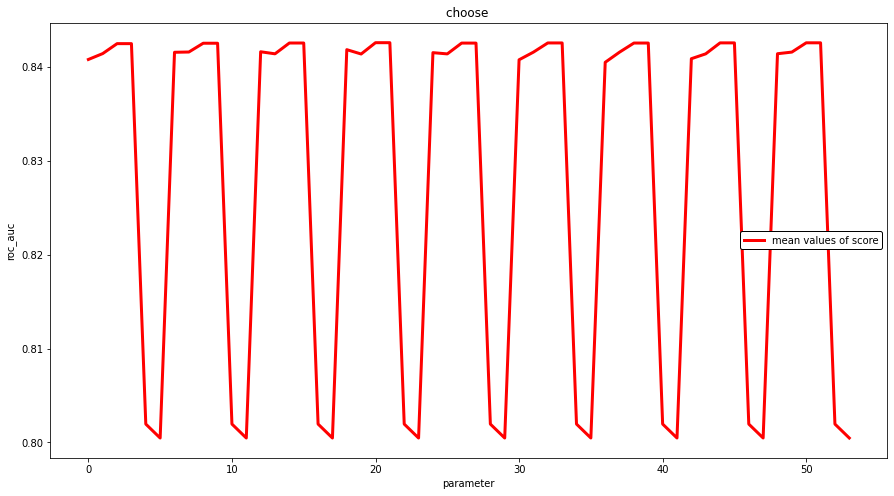

In [17]:
plt.figure(figsize=(15,8))
plt.title('choose ')


plt.plot(means, label='mean values of score', color='red', lw=3)

plt.fill_between(means - 2 * error, means + 2 * error, 
                    color='green', label='area between errors', alpha=0.3)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()

In [168]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

train_answers = cross_val_predict(LogisticRegression(), X_train, y_train, cv=5, method='predict_proba')[:, 1]
LogisticRegression.fit(X_train, y_train)

train, test = train_answers, LogisticRegression.predict_proba(X_test)[:, 1]

meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

c:\Soft\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Soft\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

TypeError: fit() missing 1 required positional argument: 'y'

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [116]:
# YOUR CODE
import catboost
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin, y, train_size=0.8)
boosting_model = catboost.CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols, num_trees=2000)

boosting_model.fit(X_train_origin, y_train, cat_features=cat_cols)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.010088
0:	total: 47.6ms	remaining: 1m 35s
1:	total: 118ms	remaining: 1m 58s
2:	total: 156ms	remaining: 1m 43s
3:	total: 198ms	remaining: 1m 38s
4:	total: 225ms	remaining: 1m 29s
5:	total: 267ms	remaining: 1m 28s
6:	total: 313ms	remaining: 1m 29s
7:	total: 358ms	remaining: 1m 29s
8:	total: 371ms	remaining: 1m 22s
9:	total: 404ms	remaining: 1m 20s
10:	total: 433ms	remaining: 1m 18s
11:	total: 451ms	remaining: 1m 14s
12:	total: 480ms	remaining: 1m 13s
13:	total: 496ms	remaining: 1m 10s
14:	total: 502ms	remaining: 1m 6s
15:	total: 530ms	remaining: 1m 5s
16:	total: 543ms	remaining: 1m 3s
17:	total: 576ms	remaining: 1m 3s
18:	total: 600ms	remaining: 1m 2s
19:	total: 627ms	remaining: 1m 2s
20:	total: 671ms	remaining: 1m 3s
21:	total: 708ms	remaining: 1m 3s
22:	total: 728ms	remaining: 1m 2s
23:	total: 737ms	remaining: 1m
24:	total: 773ms	remaining: 1m 1s
25:	total: 816ms	remaining: 1m 1s
26:	total: 824ms	remaining: 1m
27:	total: 832ms	remaining: 58.6s
28:	total: 840ms	re

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [117]:
best_model = boosting_model  # какая-то предыдущая модель

In [118]:
X_test = pd.read_csv('Datasets\\advanced-dls-spring-2021\\test.csv')
# X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent, errors='coerce')
# X_test = X_test.dropna()

submission = pd.read_csv('Datasets\\advanced-dls-spring-2021\\submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]  # / best_model.predict(X_test)
submission.to_csv('Datasets\\advanced-dls-spring-2021\\my_submission.csv', index=False)
submission

,Id,Churn
0,0,0.274596
1,1,0.240547
2,2,0.276539
3,3,0.271968
4,4,0.298207
...,...,...
1756,1756,0.285127
1757,1757,0.311578
1758,1758,0.219831
1759,1759,0.296464


In [76]:
best_model.predict_proba(X_test)[:, 1]

c:\Soft\Python\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Male'

Лучшее решение отправьте в Stepik.